In [40]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import h5py
import inspect
from tqdm import tqdm
import sys
import math
import presto
from presto import lockin, utils, hardware
from presto.hardware import AdcFSample, AdcMode, DacFSample, DacMode
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [41]:
# Load Exp Data
def load_ExpData(file_, idx_str_):
    
    # Open hdf5 file
    with h5py.File(file_, "r") as dataset:

        # Data
        return dict(freq_comb=np.asarray(dataset[idx_str_]["freq comb"]),
                    freq_pump=np.asarray(dataset[idx_str_]["freq pumps"]),
                    pump_pwr_data=np.asarray(dataset[idx_str_]["pump pwr sweep"]),
                    pump_phase_data=np.asarray(dataset[idx_str_]["pump phase sweep"]),
                    df=np.asarray(dataset[idx_str_]["df"]),
                    USB=np.asarray(dataset[idx_str_]["USB"]),
                    )

In [42]:
file = r'/home/nanophys-meas/Desktop/Jai Master Thesis/Presto-Measurement-Scripts/I:/LKiPA-Data/2025-12/Scattering/2025-12-03_14_01_00.hdf5'
run = r'2025-12-03_14_01_00'


resonance= load_ExpData(
    file_ = file,
    idx_str_= run
    )['USB']
resonance=np.array(resonance)

freqs = load_ExpData(
    file_ = file,
    idx_str_= run
    )['freq_comb']

(np.float64(1.0), np.float64(0.9686274509803922), np.float64(0.984313725490196), np.float64(1.0))


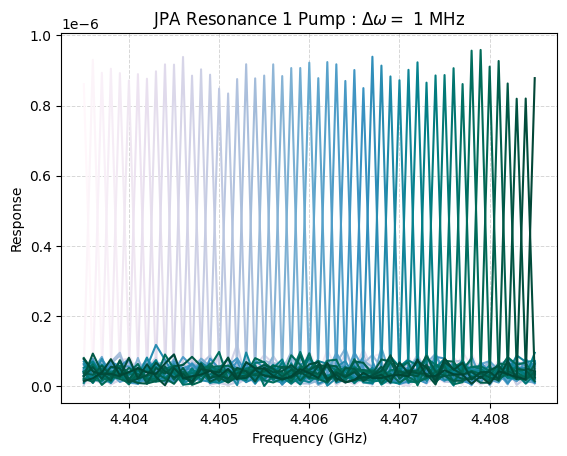

In [43]:
fig, ax = plt.subplots()

# Plot

# Colormap and normalization
cmap = cm.PuBuGn
norm = mcolors.Normalize(vmin=freqs[0], vmax=freqs[-1])

# Plotting
print(cmap(norm(0)))
for i in range(len(freqs)):
    colors = cmap(norm(freqs[i]))
    ax.plot(freqs/1e9,
            np.abs(resonance[i]), 
            color = colors,
            )

ax.set_title(
    f'JPA Resonance 1 Pump : $\\Delta \\omega = $ 1 MHz'
    )   

# Additional
ax.grid(ls='--', lw=0.7, alpha=0.5)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Response')

# Save plot
plt.show()

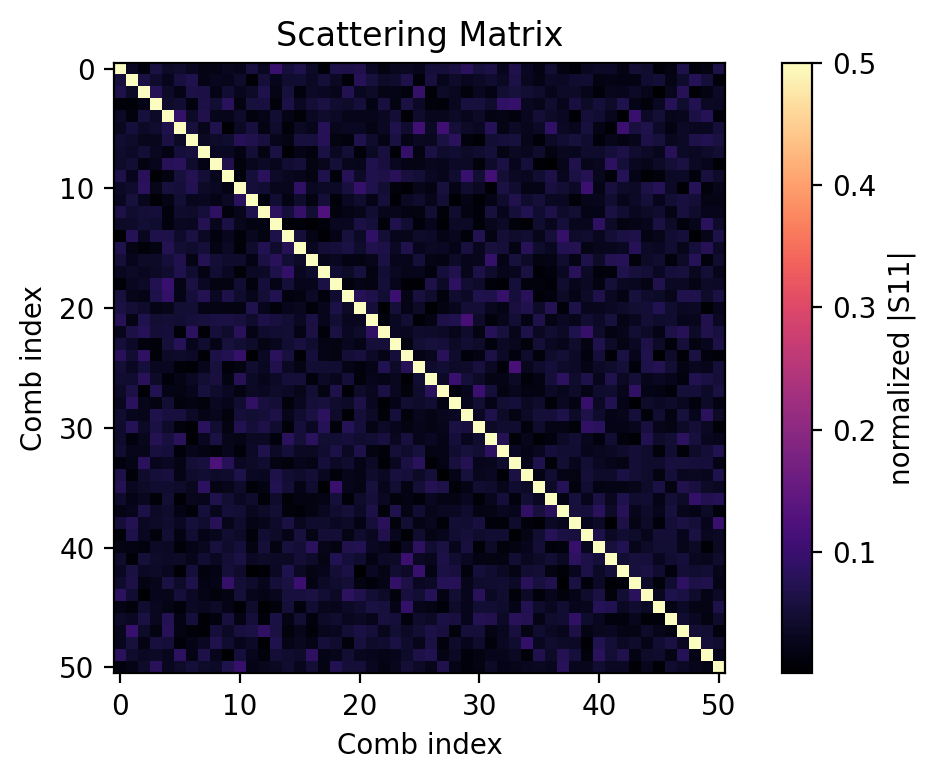

In [46]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=200)

im = ax.imshow(
    np.abs(resonance)/np.max(np.abs(resonance)), 
    aspect='equal', 
    cmap='magma', 
    origin='upper',
    vmax=5e-1
    )

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("normalized |S11|")

ax.set_xlabel("Comb index")
ax.set_ylabel("Comb index")
ax.set_title("Scattering Matrix")

plt.tight_layout()
plt.show()

(np.float64(1.0), np.float64(0.9686274509803922), np.float64(0.984313725490196), np.float64(1.0))


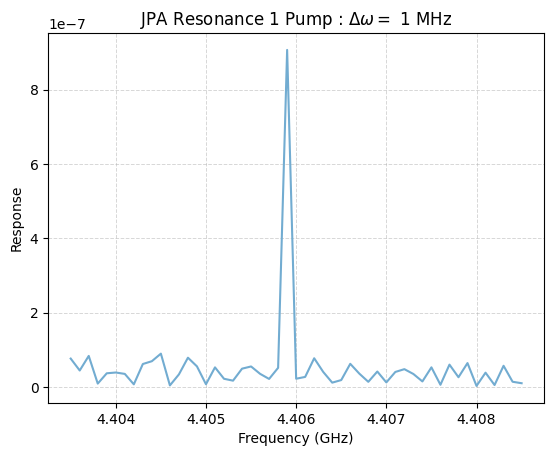

In [45]:
fig, ax = plt.subplots()

# Plot

#ax.plot(
 #   freqs/1e9, 
 #   np.abs(resonance)
 #   )   # Amp = 0.01

# Colormap and normalization
cmap = cm.PuBuGn
norm = mcolors.Normalize(vmin=freqs[0], vmax=freqs[-1])

# Plotting
print(cmap(norm(0)))

colors = cmap(norm(freqs[24]))
ax.plot(freqs/1e9,
        np.abs(resonance[24]), 
        color = colors,
        )


ax.set_title(
    f'JPA Resonance 1 Pump : $\\Delta \\omega = $ 1 MHz'
    )   

# Additional

ax.grid(ls='--', lw=0.7, alpha=0.5)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Response')

# Save plot

plt.show()